## Task 1

German dataset contains both numerical and categorical variables. Firstly, I checked there is any missing value in data and converted each categorical/symbolic variable into numerical variables in order to be suitable for feature selection analysis and learning algorithm. With this conversion, some feature columns such as "purpose", "personal_status_sex" are spreaded to several columns because these variables cannot be labeled with a linear logic. Then, I used correlation and p value statistics for feature selection. Finally, I applied the appropriate machine learning model to the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\Deren\AppData\Roaming\Python\Python37\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"

names= ["status","duration","credit_history","purpose","amount","savings","employment_duration","installment_rate",
        "personal_status_sex","other_debtors","present_residence","property", "age","other_installment_plans", "housing" ,
        "number_credits","job","people_liable","telephone","foreign_worker","credit_risk"]

data = pd.read_csv(url,sep =" ", header = None)

data.columns = data.columns[:0].tolist() + names


In [3]:
data.head(5)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [4]:
data.isnull().sum().sum() # chekcing missing values

0

In [5]:

list1= ["status","credit_history","savings","employment_duration","property","job"]

for i in list1:
    data[i]=data[i].astype('category')
    
cat_columns = data.select_dtypes(['category']).columns

data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)

list2 = ["purpose","personal_status_sex","other_debtors","other_installment_plans","housing"] 

data =pd.get_dummies(data=data,columns=list2 )

data['telephone'] = data['telephone'].map({'A192': 1, 'A191': 0})
data['foreign_worker'] = data['foreign_worker'].map({'A201': 1, 'A202': 0})


data.head(5)

,status,duration,credit_history,amount,savings,employment_duration,installment_rate,present_residence,property,age,...,personal_status_sex_A94,other_debtors_A101,other_debtors_A102,other_debtors_A103,other_installment_plans_A141,other_installment_plans_A142,other_installment_plans_A143,housing_A151,housing_A152,housing_A153
0,0,6,4,1169,4,4,4,4,0,67,...,0,1,0,0,0,0,1,0,1,0
1,1,48,2,5951,0,2,2,2,0,22,...,0,1,0,0,0,0,1,0,1,0
2,3,12,4,2096,0,3,2,3,0,49,...,0,1,0,0,0,0,1,0,1,0
3,0,42,2,7882,0,3,2,4,1,45,...,0,0,0,1,0,0,1,0,0,1
4,0,24,3,4870,0,2,3,4,3,53,...,0,1,0,0,0,0,1,0,0,1


In [6]:
data.head(10)

,status,duration,credit_history,amount,savings,employment_duration,installment_rate,present_residence,property,age,...,personal_status_sex_A94,other_debtors_A101,other_debtors_A102,other_debtors_A103,other_installment_plans_A141,other_installment_plans_A142,other_installment_plans_A143,housing_A151,housing_A152,housing_A153
0,0,6,4,1169,4,4,4,4,0,67,...,0,1,0,0,0,0,1,0,1,0
1,1,48,2,5951,0,2,2,2,0,22,...,0,1,0,0,0,0,1,0,1,0
2,3,12,4,2096,0,3,2,3,0,49,...,0,1,0,0,0,0,1,0,1,0
3,0,42,2,7882,0,3,2,4,1,45,...,0,0,0,1,0,0,1,0,0,1
4,0,24,3,4870,0,2,3,4,3,53,...,0,1,0,0,0,0,1,0,0,1
5,3,36,2,9055,4,2,2,4,3,35,...,0,1,0,0,0,0,1,0,0,1
6,3,24,2,2835,2,4,3,4,1,53,...,0,1,0,0,0,0,1,0,1,0
7,1,36,2,6948,0,2,2,2,2,35,...,0,1,0,0,0,0,1,1,0,0
8,3,12,2,3059,3,3,2,4,0,61,...,0,1,0,0,0,0,1,0,1,0
9,1,30,4,5234,0,0,4,2,2,28,...,1,1,0,0,0,0,1,0,1,0


## Task 2

Feature selection is the important step of machine learning because removing the irrelevant or less important features increase the accuracy of model. For supervised machine learning tasks, feature selection can be accomplished on the basis of correlation and p value statistics.

Correlation is a measure of relation between variables that is measured on a -1 to 1 scale. The closer the correlation value is to -1 or 1 the stronger the relationship, the closer to 0, the weaker the relationship. It measures how change in one variable is associated with change in another variable. Features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. So, when two features have high correlation, we can drop one of the two features. In german dataset, there are not any features that have a correlation higher than 0.9.


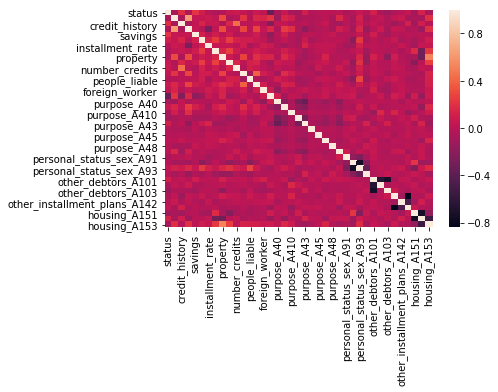

In [7]:
corr = data.corr()
sns.heatmap(corr)

In [8]:
corr.credit_risk.abs().sort_values(ascending=False)

credit_risk                     1.000000
status                          0.350847
credit_history                  0.228785
duration                        0.214927
savings                         0.178943
amount                          0.154739
property                        0.142612
housing_A152                    0.134589
employment_duration             0.116002
other_installment_plans_A143    0.113285
purpose_A43                     0.106922
purpose_A41                     0.099791
purpose_A40                     0.096900
other_installment_plans_A141    0.096510
housing_A151                    0.092785
age                             0.091127
foreign_worker                  0.082079
housing_A153                    0.081556
personal_status_sex_A93         0.080677
personal_status_sex_A92         0.075493
installment_rate                0.072404
purpose_A46                     0.070088
other_debtors_A102              0.062728
other_debtors_A103              0.055039
other_installmen


When we perform a hypothesis test in statistics (in this case, H0 hypothesis says there is no relationship between two measured variables.), p-value helps determine the statistical significance of test result. A low P value suggests that our sample provides enough evidence that we can reject the H0 hypothesis. If the obtained p-value is less than what it is being tested at, then one can state that there is a significant relationship between the variables. Most fields use an alpha level of 0.05 which I will also use.

Correlation quantifies the degree to which two variables are related, does not fit a line through the data points.
Ordinary least squares (OLS) regression finds the best line that predicts Y from X so I checked the ordinary least squares p value for feature elimination.

In the following code, I selected the features by checking whether the ordinary least squares p value less than 0.05.

In [9]:
import statsmodels.api as sm

x = data.drop(["credit_risk"],axis=1).values
Y=data.credit_risk.values

selected_columns = data.drop(["credit_risk"],axis=1).columns

numVars = len(x[0])
for i in range(0, numVars):
    model = sm.OLS(Y, x).fit()
    max_pvalue = max(model.pvalues).astype(float)
    if max_pvalue > 0.05:
        for j in range(0, numVars - i):
            if (model.pvalues[j].astype(float) == max_pvalue):
                x = np.delete(x, j, 1)
                selected_columns = np.delete(selected_columns, j)
                
df = pd.DataFrame(data = x, columns = selected_columns)
df.columns #selected columns

Index(['status', 'duration', 'credit_history', 'amount', 'savings',
       'installment_rate', 'foreign_worker', 'purpose_A40', 'purpose_A46',
       'personal_status_sex_A91', 'personal_status_sex_A92',
       'personal_status_sex_A93', 'personal_status_sex_A94',
       'other_debtors_A101', 'other_debtors_A102', 'other_debtors_A103',
       'other_installment_plans_A141', 'other_installment_plans_A142',
       'other_installment_plans_A143', 'housing_A151', 'housing_A152',
       'housing_A153'],
      dtype='object')

## Task 3

There are various learning method for classification such as k-nn, support vector machines,decision tree, naivebayes. I applied all these models to the data and I got the best accuracy from logistic regression. It can be expected result because logistic regression model is appropriate for our binary classification problem.

Logistic regression is used for binary classification problems. For instance, yes/no, true/false. For our dataset, dependent variable has two class so logistic regression can be used to classify customers as good or bad. This model splits the space 
into two halves using a hyper-plane. The deeper the point into one of these halves, the greater the probability that the point belongs to this half.

I used python scikit-learn library to create model. Firstly, I split the data as train and test. After training, model predict whether customer is good from test data.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score



In [11]:
X = df
y = data.credit_risk
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)


In [12]:
model = LogisticRegression()
model.fit(X_train,y_train)
pred=model.predict(X_test)
pred

C:\Users\Deren\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2,
       1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2,
       2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

## Task 4 

For checking the correctness of the model, we can use the accuracy and confusion matrix. Classification accuracy is the ratio of correct predictions to total predictions made. A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values. Each row of the matrix corresponds to a predicted class. Each column of the matrix corresponds to an actual class.



In [13]:

print( confusion_matrix(y_test, pred))
print("Accuracy:",accuracy_score(y_test,pred))


[[152  24]
 [ 31  43]]
Accuracy: 0.78
